# Online Payment and Fraud Detection

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
# Reading in the dataset

df = pd.read_csv('Online Payment Fraud Detection.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [3]:
# Checking for the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [4]:
# Checking for null values

df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [5]:
# Filtering the specific variable in Step column

df_day_hour = df[df['step'].isin([2])]
print(df_day_hour)

      step     type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
2708     2  PAYMENT   1826.81    C70165127       24622.00        22795.19   
2709     2  PAYMENT   7709.20   C520830206       52152.00        44442.80   
2710     2  PAYMENT   3023.16  C1705281026         178.00            0.00   
2711     2  PAYMENT   3708.43   C862062296           0.00            0.00   
2712     2  PAYMENT   8702.16   C521270862       20929.00        12226.84   
...    ...      ...       ...          ...            ...             ...   
3717     2  PAYMENT   3453.72   C386153220      725590.38       722136.67   
3718     2  PAYMENT    562.14   C837981622      722136.67       721574.53   
3719     2  PAYMENT  33459.40  C1283634655      721574.53       688115.13   
3720     2  PAYMENT    735.15  C1108651663      688115.13       687379.98   
3721     2  PAYMENT   3503.31   C584866226       12158.00         8654.69   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  
2708  M2026706

In [6]:
# Checking for unique values in the type column

df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [7]:
# Counting the number of values in the type column

df['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

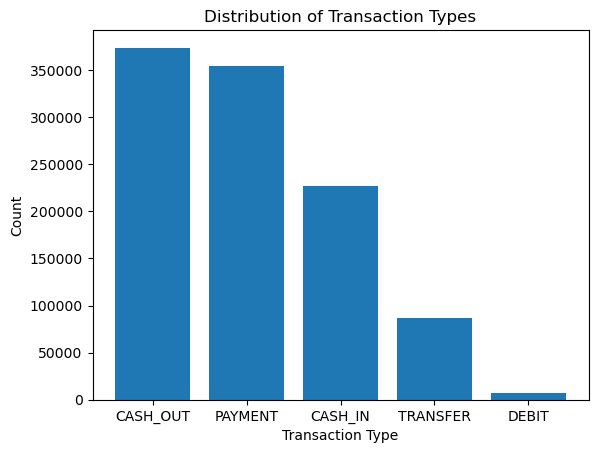

In [9]:
# Counting the number of occurrences of each category
category_counts = df['type'].value_counts()

# Creating a bar plot showing the variables in type column
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')
plt.show()

### Bivariate Analysis

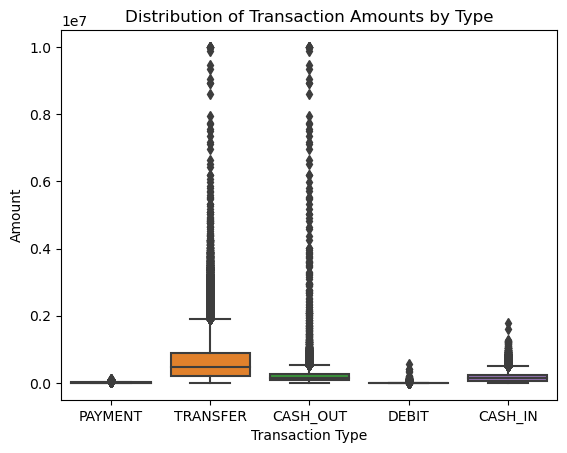

In [10]:
# Create a box plot of 'amount' grouped by 'type'
sns.boxplot(x='type', y='amount', data=df)
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.title('Distribution of Transaction Amounts by Type')
plt.show()

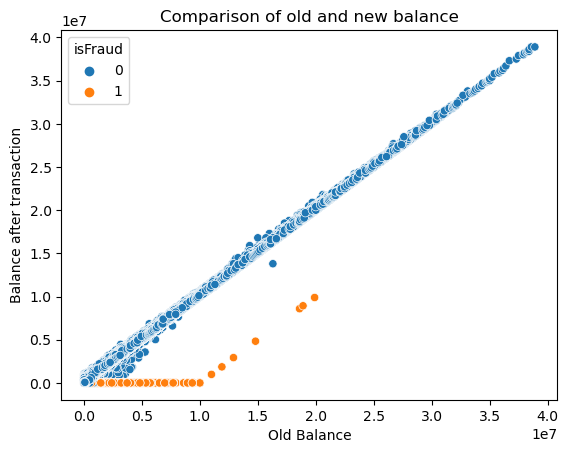

In [11]:
# visualize balance before the transaction and balance after the transaction and hue is fraud

sns.scatterplot(data=df, x="oldbalanceOrg", y= "newbalanceOrig", hue='isFraud')
plt.xlabel("Old Balance")
plt.ylabel("Balance after transaction")
plt.title("Comparison of old and new balance")
plt.show()

### Heatmap to show correlation

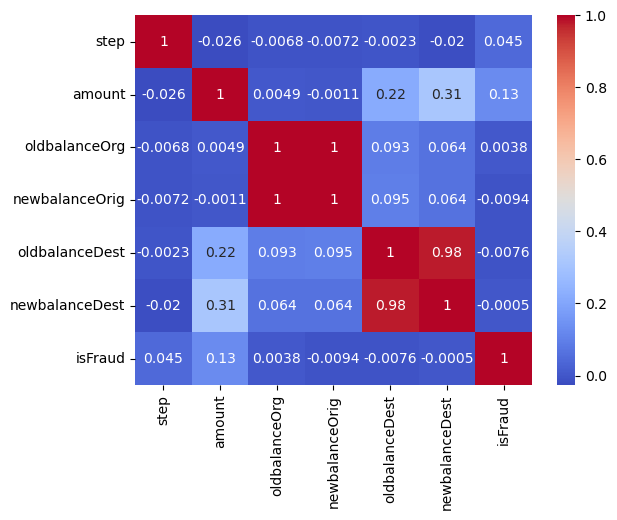

In [12]:
# Using the correlation method .corr() to discover correlations between variables

corr = df.corr()

# Use a heatmap to visualize the correlations
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

In [13]:
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


In [15]:
# Creating a copy of the dataframe

test_df = df.copy()

### Multivariate Analysis

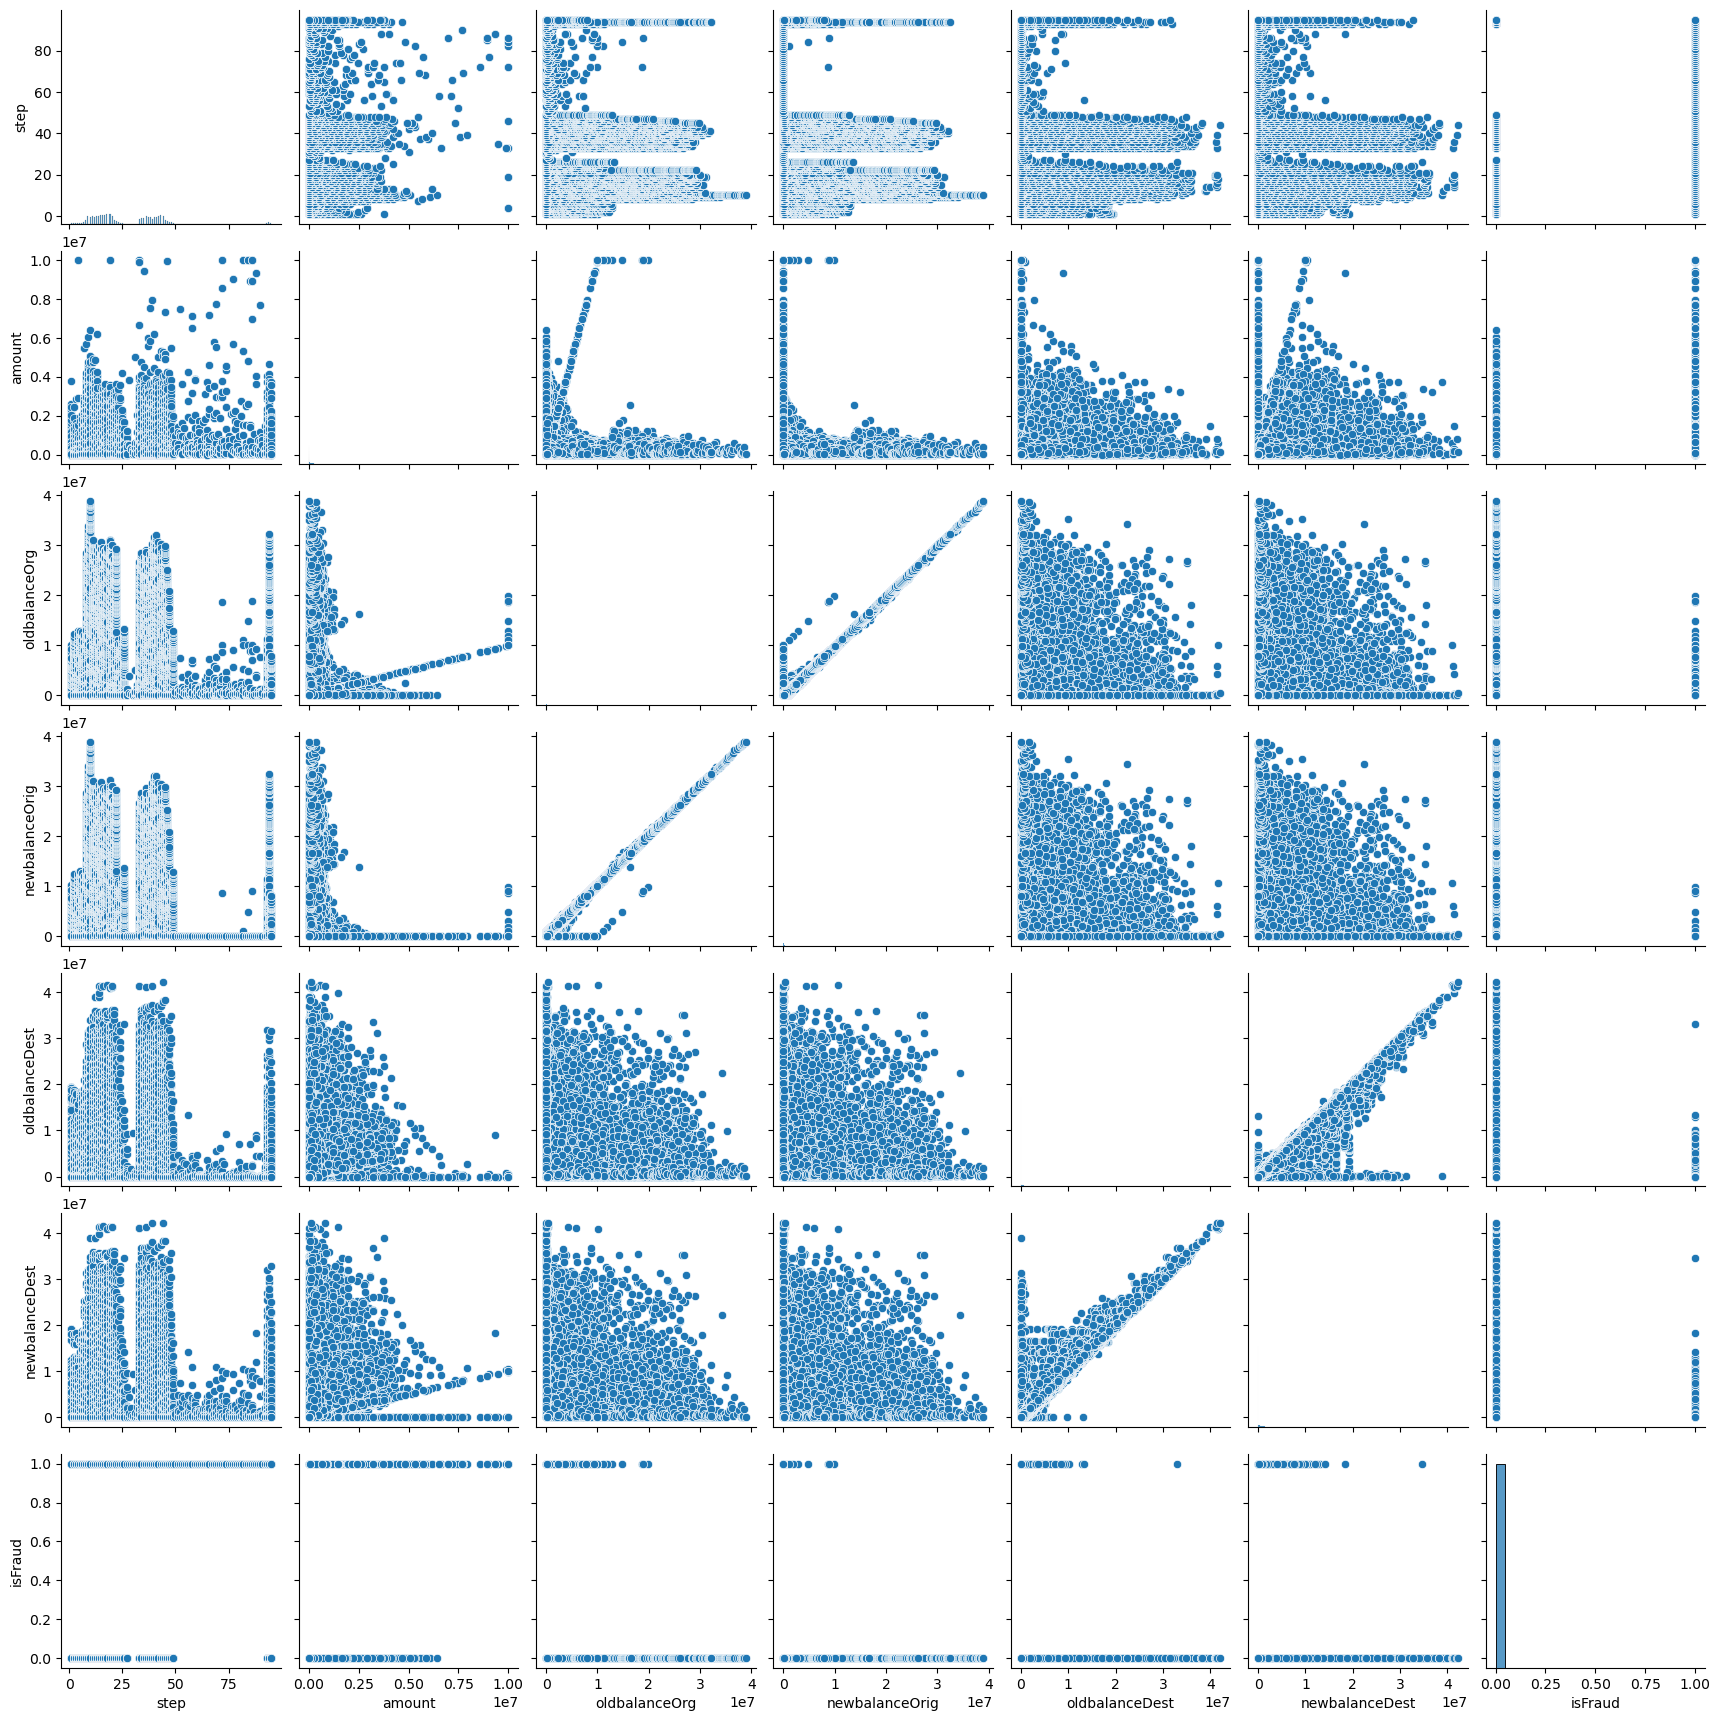

In [19]:
# Select a subset of columns for pairwise relationships
columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']

# Create a pair plot of the selected columns
sns.pairplot(test_df[columns])
plt.show()

## Data Preprocessing Steps
- Feature Engineering
- Encoding
- Scaling

In [16]:
from sklearn import preprocessing

In [17]:
# Seperating the target variable from the dataset and dropping redundant variables

target = df['isFraud']
df = df.drop(columns=['isFraud','nameOrig', 'nameDest' ], axis = 1)

In [18]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0


In [20]:
# Encoding the rest of the dataframe using one-hot encoding style

df = pd.get_dummies(df, columns=['type'])
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,1,0,0,0
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,1,0
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,1,0
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,1,0


In [21]:
print(df.columns)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


In [22]:
# Creating new columns to show the differences in new balance and old balance

df['balanceChangeOrig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceChangeDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [23]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balanceChangeOrig,balanceChangeDest
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0,-9839.64,0.00
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0,-1864.28,0.00
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1,-181.00,0.00
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0,-181.00,-21182.00
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0,-11668.14,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,1,0,0,0,-132557.35,132557.35
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,1,0,-9917.36,0.00
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,1,0,-14140.05,0.00
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,1,0,-10020.05,0.00


### Scaling the dataset

In [24]:
# Import MinMaxScaler from the sckit 

from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [25]:
# Instantiate the scaler object and store it as a variable called scaler
# Fit the scaler object on the dataframe

scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [26]:
df

array([[0.00000000e+00, 9.83954010e-04, 4.37367609e-03, ...,
        0.00000000e+00, 8.47128903e-01, 2.52185852e-01],
       [0.00000000e+00, 1.86418002e-04, 5.46246787e-04, ...,
        0.00000000e+00, 8.47802555e-01, 2.52185852e-01],
       [0.00000000e+00, 1.80900002e-05, 4.65295630e-06, ...,
        1.00000000e+00, 8.47944736e-01, 2.52185852e-01],
       ...,
       [1.00000000e+00, 1.41399501e-03, 5.28149100e-04, ...,
        0.00000000e+00, 8.46765662e-01, 2.52185852e-01],
       [1.00000000e+00, 1.00199501e-03, 2.32917738e-03, ...,
        0.00000000e+00, 8.47113665e-01, 2.52185852e-01],
       [1.00000000e+00, 1.14499301e-03, 2.07159254e-03, ...,
        0.00000000e+00, 8.46992879e-01, 2.52185852e-01]])

## Model Building
- Split the dataset into two which is train and test
- Train Model on the training data set and evaluate the performance on the testing dataset

In [27]:
# From the sckit learn library import cross validation 

from sklearn.model_selection import train_test_split

In [28]:
# Splitting the dataset into train and test

X_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

### Import LogisticRegression Model

In [29]:
# Import the LogisticRegression Model from the sckit learn library

from sklearn.linear_model import LogisticRegression

In [30]:
# Create a LogisticRegression object and instantiate it 
# Then fit the model on top of subset of the dataset kept for training

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Predict on the test dataset
# Pass the subset of the dataset kept for testing

predictions = model.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model Evaluation (Performance Metrics)

In [32]:
# Importing the auc metric

from sklearn.metrics import roc_auc_score

In [33]:
# Instantiate the metric to a variable called score
# ROC curve

score = roc_auc_score(y_test, predictions)
score

0.5781226132626223

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy = accuracy_score(y_test, predictions)

In [36]:
accuracy

0.9990940085353933

In [37]:
from sklearn.metrics import f1_score, precision_score

f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)

In [38]:
f1

0.26923076923076916

In [39]:
precision

0.9722222222222222

In [40]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, predictions)
recall

0.15625

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### RandomForestRegressor Model

In [42]:
# Create a RandonForestRegression object and instantiate it 
# Then fit the model on top of subset of the dataset kept for training

RandomForestRegressor 
r_mod = RandomForestRegressor()
r_mod.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
# Predict on the test dataset
# Pass the subset of the dataset kept for testing

r_pred = r_mod.predict(x_test)

In [44]:
r_score = metrics.r2_score(r_pred, y_test)
r_score

0.7777093013690195

### DecisionTreeRegressor Model

In [45]:
# import DecisionTreeRegressor model from the sckit learn library

from sklearn.tree import DecisionTreeRegressor

In [46]:
# Create a DecisionTreeRegressor object and instantiate it 
# Then fit the model on top of subset of the dataset kept for training

t_reg = DecisionTreeRegressor()
t_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [47]:
# Predict on the test dataset
# Pass the subset of the dataset kept for testing

t_pred = t_reg.predict(x_test)

### Performance Metrics

In [48]:
t_score = metrics.r2_score(t_pred, y_test)

In [49]:
t_score

0.6776032968314205

### DecisionTreeClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
t_class = DecisionTreeClassifier()
t_class.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
t_class_pred =t_class.predict(x_test)

In [54]:
t_class_score = t_class.score(x_test, y_test)
accuracy = accuracy_score(y_test, t_class_pred)

In [55]:
t_class_score

0.9996519085425458

In [56]:
from sklearn.metrics import f1_score

In [57]:
f1 = f1_score(y_test, t_class_pred)

In [58]:
f1

0.8402625820568927

In [59]:
from sklearn.metrics import roc_auc_score

# Get the predicted probabilities for the positive class
t_class_pred_proba = t_class.predict_proba(x_test)[:, 1]

auc = roc_auc_score(y_test, t_class_pred_proba)

In [60]:
auc

0.9284735723389413

In [61]:
#!pip install lightgbm

### More Experimental Models

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [63]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)  # Random Forest Classifier
rf_predictions = rf_model.predict(x_test)  # Random Forest Classifier

rf_accuracy = accuracy_score(y_test, rf_predictions)  # Random Forest Classifier
rf_accuracy

0.999766349569654

In [64]:
svm_model = SVC()

svm_model.fit(X_train, y_train)  # SVM

svm_predictions = svm_model.predict(x_test)  # SVM

svm_accuracy = accuracy_score(y_test, svm_predictions)  # SVM
svm_accuracy

0.9991321555444294

In [65]:
xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train)  # XGBoost

xgb_predictions = xgb_model.predict(x_test)  # XGBoost

xgb_accuracy = accuracy_score(y_test, xgb_predictions)  # XGBoost
xgb_accuracy

0.9998378752115967

In [66]:
lgb_model = lgb.LGBMClassifier()

lgb_model.fit(X_train, y_train)  # LightGBM

lgb_predictions = lgb_model.predict(x_test)  # LightGBM

lgb_accuracy = accuracy_score(y_test, lgb_predictions)  # LightGBM
lgb_accuracy

0.9985265717759817

### Confusion Matrix (Evaluation of the Predictions)

In [68]:
from sklearn.metrics import confusion_matrix

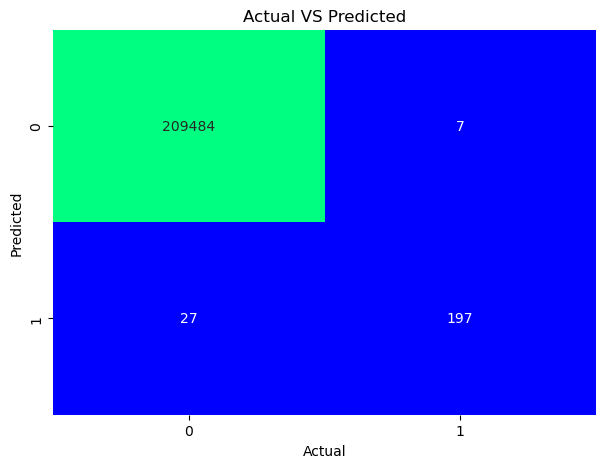

In [71]:
cm = confusion_matrix(y_test, xgb_predictions)
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,cbar=False, fmt='d', cmap='winter')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual VS Predicted")
plt.show()

In [67]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import VotingRegressor

# # Define the models
# model1 = LinearRegression()
# model2 = DecisionTreeRegressor(random_state=40)
# model3 = RandomForestRegressor(random_state=40)
# model4 = SVR(kernel='linear')
# model5 = KNeighborsRegressor(n_neighbors=3)
# model6 = GradientBoostingRegressor(random_state=40)

# # Combine the models into an ensemble
# model = VotingRegressor(estimators=[('lr', model1), 
#                                     ('dt', model2), 
#                                     ('rf', model3), 
#                                     ('svr', model4),
#                                     ('knn', model5),
#                                     ('gbm', model6)])

# # Fit the ensemble model
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(x_test)

# # Evaluate the model
# score = metrics.r2_score(y_test, y_pred)
# mse = metrics.mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# print(f"R2 Score: {score}")
# print(f"Mean Squared Error: {mse}")
# print(f"Root Mean Squared Error: {rmse}")